2


Text(797.4950942977803, 0.3439403069019318, 'mono')

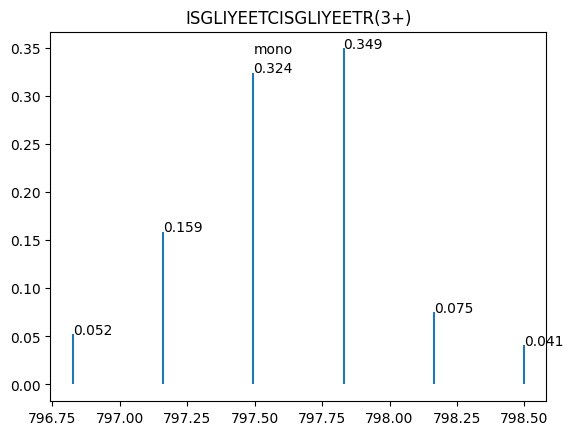

In [8]:
import numpy as np
import pandas as pd

from alphabase.peptide.precursor import (
    calc_precursor_isotope_intensity, update_precursor_mz
)
from alphabase.constants.aa import reset_AA_atoms
from alphabase.constants.atom import CHEM_INFO_DICT
CHEM_INFO_DICT['12C'] = CHEM_INFO_DICT['C'] #backup
CHEM_INFO_DICT['C'] = CHEM_INFO_DICT['13C']

reset_AA_atoms()

precursor_df = pd.DataFrame(dict(
    sequence=["ISGLIYEETCISGLIYEETR"],
    mods="",
    mod_sites="",
    charge=3
))
precursor_df = calc_precursor_isotope_intensity(precursor_df)
precursor_df = update_precursor_mz(precursor_df)
mono_idx = precursor_df.mono_isotope_idx[0]

masses = precursor_df.precursor_mz[0]+1.0033*np.arange(-mono_idx, 6-mono_idx)/precursor_df.charge[0]
import matplotlib.pyplot as plt
plt.vlines(
    masses, 
    np.zeros(6), 
    precursor_df["i_0,i_1,i_2,i_3,i_4,i_5".split(',')].values[0,:]
)
plt.title(f"{precursor_df.sequence[0]}({precursor_df.charge[0]}+)")
for x, y in zip(
    masses, 
    precursor_df["i_0,i_1,i_2,i_3,i_4,i_5".split(',')].values[0,:]
):
    plt.text(x, y, f"{y:.3f}")
print(mono_idx)
x = precursor_df.precursor_mz[0]
y = precursor_df["i_"+str(mono_idx)][0]
plt.text(x, y+0.02, f"mono")

(3821.8765415544003, 3832.9062415544004)

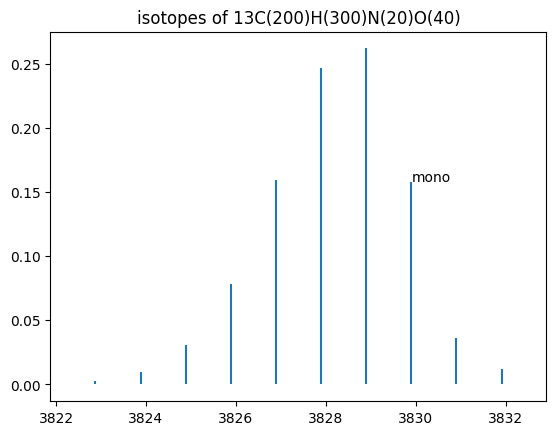

In [2]:
from alphabase.constants.isotope import IsotopeDistribution
from alphabase.constants.atom import calc_mass_from_formula, parse_formula

iso_dist = IsotopeDistribution()
composition = '13C(200)H(300)N(20)O(40)'
formula = parse_formula(composition)
isotope_intens,mono = iso_dist.calc_formula_distribution(formula)
isotope_masses = calc_mass_from_formula(composition)+np.arange(len(isotope_intens))*1.0033


plt.vlines(
    isotope_masses, 
    np.zeros(len(isotope_intens)), 
    isotope_intens
)
plt.title(f"isotopes of {composition}")

plt.text(isotope_masses[mono], isotope_intens[mono], 'mono')

plt.xlim(isotope_masses[0]-1, isotope_masses[-1]+1)